In [400]:
import pandas as pd
import geopandas as gpd 
import requests 
import json
from datetime import datetime
from io import StringIO
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from shapely import wkt


In [2]:
from airqualityandclimateAPI import *

In [ ]:
# !pip install geopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [geopy]


In [3]:
illinoiscode = '17'
cookcode = '031'
extra = 'none'

# PMdf = airquality(illinoiscode, cookcode, True)
airdf = airquality(illinoiscode, cookcode, 2025, PMcodes=False)

Air quality API request took 62.08484506607056 seconds


In [6]:
airdf['date_local'] = pd.to_datetime(airdf['date_local'])
airdf['date_local'].max()

# airdf.head()

Timestamp('2025-11-30 00:00:00')

In [ ]:
# PM code checker:
# codeequals = PMdf.loc[PMdf['code'] == '88105', 'value_represented']

# Code list:
# for index, row in PMdf.iterrows():
#     print(row['code'], row['value_represented'])


NameError: name 'PMdf' is not defined

In [10]:
dir = '/Users/griffinberonio/Documents/AAE 724/Datasets/climatedata'
totaldf = None
for file in os.listdir(dir):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(dir, file))
        if totaldf is None:
            totaldf = df
        else:
            totaldf = pd.concat([totaldf, df], ignore_index=True)

filepath = '/Users/griffinberonio/Documents/AAE 724/Datasets/climatedata/totalclimatedata.csv'
totaldf.to_csv(filepath, index=False)

/var/folders/d1/xmw0d36x7fn39t0jfvtsbzk80000gn/T/ipykernel_33395/4040326799.py:5: DtypeWarning: Columns (9,11,12,13,14,15,36,55,92,93,94,95,96,97,98,99,100,101,102,103) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(dir, file))
/var/folders/d1/xmw0d36x7fn39t0jfvtsbzk80000gn/T/ipykernel_33395/4040326799.py:5: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(dir, file))


In [14]:
totaldf.head()
# totaldf['STATION'].unique()

totaldf['DATE'] = pd.to_datetime(totaldf['DATE'])
totaldf['DATE'].max()


Timestamp('2025-01-02 23:55:00')

# Renewable Generators Data 

In [190]:
renewablespath = '/Users/griffinberonio/Documents/AAE 724/Datasets/RenewableGeneratorsRegisteredinGATS_20260203_110659.csv'
renewablesdf = pd.read_csv(renewablespath, encoding='latin-1')
# renewablesdf.head()

/var/folders/d1/xmw0d36x7fn39t0jfvtsbzk80000gn/T/ipykernel_33395/3715769141.py:2: DtypeWarning: Columns (4,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26) have mixed types. Specify dtype option on import or set low_memory=False.
  renewablesdf = pd.read_csv(renewablespath, encoding='latin-1')


In [225]:
cookrenewables = renewablesdf[(renewablesdf['State'] == 'IL') & (renewablesdf['County'] == 'Cook')]
cookrenewables['Date Online'] = pd.to_datetime(cookrenewables['Date Online'])
cookrenewables['Date Online'].min()

/var/folders/d1/xmw0d36x7fn39t0jfvtsbzk80000gn/T/ipykernel_33395/4255853314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cookrenewables['Date Online'] = pd.to_datetime(cookrenewables['Date Online'])


Timestamp('1989-03-01 00:00:00')

In [226]:
# Find the total number of active renewable generators in the county, and the total capacity of those generators.
cookrenewables.shape
plants = cookrenewables['Plant Name'].unique()
gencolumns = cookrenewables.columns
uniqueids = cookrenewables['GATS Unit ID'].unique()
cookrenewables['YEAR'] = cookrenewables['Date Online'].dt.year
cookrenewables['MONTH'] = cookrenewables['Date Online'].dt.month
#Filtering by study period: 
cookfiltered = cookrenewables[(cookrenewables['YEAR'] >= 2015) & (cookrenewables['YEAR'] < 2026)]
filteredids = cookfiltered['GATS Unit ID'].unique()

len(uniqueids)

/var/folders/d1/xmw0d36x7fn39t0jfvtsbzk80000gn/T/ipykernel_33395/1733117344.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cookrenewables['YEAR'] = cookrenewables['Date Online'].dt.year
/var/folders/d1/xmw0d36x7fn39t0jfvtsbzk80000gn/T/ipykernel_33395/1733117344.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cookrenewables['MONTH'] = cookrenewables['Date Online'].dt.month


26513

/var/folders/d1/xmw0d36x7fn39t0jfvtsbzk80000gn/T/ipykernel_33395/718277245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cookfiltered['Count'] = cookfiltered.groupby('YEAR')['GATS Unit ID'].transform('count')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018'),
  Text(4, 0, '2019'),
  Text(5, 0, '2020'),
  Text(6, 0, '2021'),
  Text(7, 0, '2022'),
  Text(8, 0, '2023'),
  Text(9, 0, '2024'),
  Text(10, 0, '2025')])

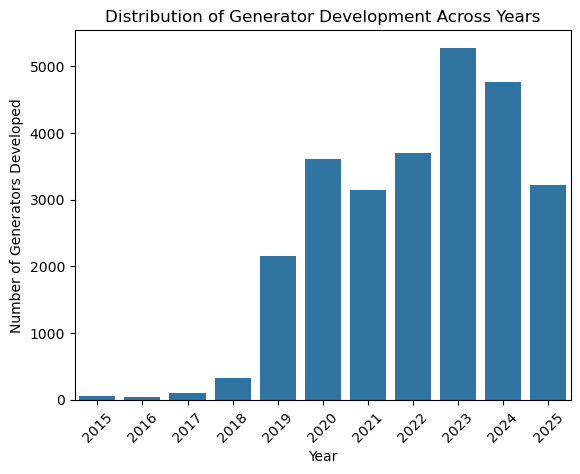

In [227]:
# Look at the distribution of generator development across all years, identify the top three years for generator development 
cookfiltered['Count'] = cookfiltered.groupby('YEAR')['GATS Unit ID'].transform('count')

sns.barplot(x='YEAR', y='Count', data=cookfiltered)
plt.title('Distribution of Generator Development Across Years')
plt.xlabel('Year')
plt.ylabel('Number of Generators Developed')
plt.xticks(rotation=45)

In [228]:
top3year = cookfiltered['YEAR'].value_counts().nlargest(3).index.tolist()
top3year

[2023, 2024, 2022]

In [ ]:
# Look at the mean, median, and standard deviation of generator development across all years:
yearly_stats = pd.DataFrame(cookfiltered['Count'].agg(['count', 'mean','std','median']).round(2))
yearly_stats = yearly_stats.rename(columns={'Count' : 'Value'})
yearly_stats

,Value
count,26419.00
mean,3877.52
std,1080.10
median,3704.00


/var/folders/d1/xmw0d36x7fn39t0jfvtsbzk80000gn/T/ipykernel_33395/3664438447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cookfiltered['yearly total capacity'] = cookfiltered.groupby('YEAR')['Nameplate'].transform('sum')
/var/folders/d1/xmw0d36x7fn39t0jfvtsbzk80000gn/T/ipykernel_33395/3664438447.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cookfiltered['average capacity'] = cookfiltered.groupby('YEAR')['Nameplate'].transform('mean')
/var/folders/d1/xmw0d36x7fn39t0jfvtsbzk80000gn/T/ipykernel_33

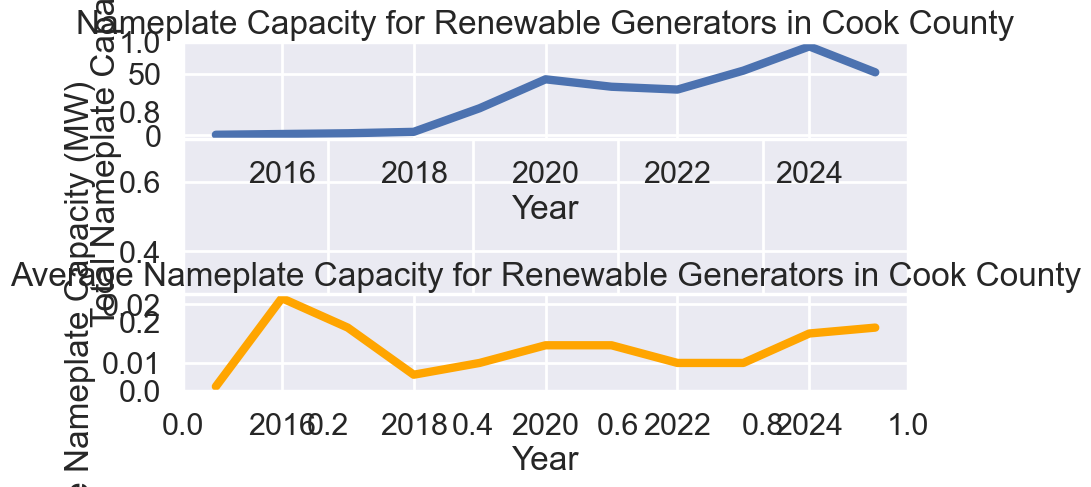

In [767]:
# Looking at Nameplate Capactiy Distribution: 
cookfiltered['yearly total capacity'] = cookfiltered.groupby('YEAR')['Nameplate'].transform('sum')

fig, ax = plt.subplots(figsize=(10, 6))
plt.subplot(2,1,1)
sns.lineplot(x='YEAR', y='yearly total capacity', data=cookfiltered, linewidth=6)
plt.title('Nameplate Capacity for Renewable Generators in Cook County')
plt.xlabel('Year')
plt.ylabel('Total Nameplate Capacity (MW)')

# Average Nameplate Capacity:
cookfiltered['average capacity'] = cookfiltered.groupby('YEAR')['Nameplate'].transform('mean')
cookfiltered['average capacity'] = cookfiltered['average capacity'].round(3)
plt.subplot(2,1,2)
sns.lineplot(x='YEAR', y='average capacity', data=cookfiltered, linewidth=6, color = 'orange')
plt.title('Average Nameplate Capacity for Renewable Generators in Cook County')
plt.xlabel('Year')
plt.ylabel('Average Nameplate Capacity (MW)')

plt.tight_layout()

In [243]:
#Finding the names of maximum nameplate capacity generators overall:
max_capacity = cookfiltered['Nameplate'].sort_values().tail(10)
max_capacity_generators = cookfiltered[cookfiltered['Nameplate'].isin(max_capacity)][['Plant Name', 'Nameplate']]
max_capacity_generators.sort_values(by='Nameplate', ascending=False)

,Plant Name,Nameplate
60104,Cottage Grove Ave Solar,2.99280
100312,"Gooseberry Solar, LLC",2.94801
134361,"Torrence Ave Solar 1, LLC",2.94801
114877,North Cottage Grove Solar 1 LLC,2.82100
52460,Albertsons at Melrose Park,2.77164
99803,"Gelita USA, Inc. (Applic ID #25029 IL ABP)",2.65914
100169,Glenwood Solar,2.64480
30627,105125 - IL BEDFORD PARK 7035 W 65TH ST (19575),2.59794
51402,92756 - IL BEDFORD PARK 6901 W 65TH ST (19574),2.37762
102363,IGS Frankfort 2 - ID 1673,2.33682


/var/folders/d1/xmw0d36x7fn39t0jfvtsbzk80000gn/T/ipykernel_33395/3714347330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cookfiltered['monthlycounts'] = cookfiltered.groupby(['YEAR', 'MONTH'])['GATS Unit ID'].transform('count')


([<matplotlib.axis.XTick at 0x37e064b90>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

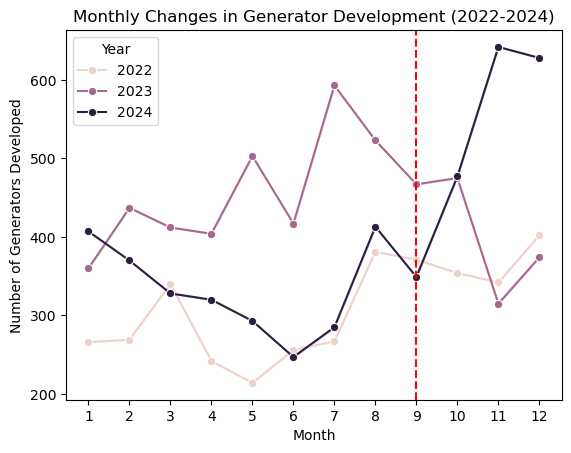

In [247]:
# Monthly changes in development between 2022 and 2024:
cookfiltered['monthlycounts'] = cookfiltered.groupby(['YEAR', 'MONTH'])['GATS Unit ID'].transform('count')
monthlydf = cookfiltered[(cookfiltered['YEAR'] >= 2022) & (cookfiltered['YEAR'] < 2025 )]

sns.lineplot(x='MONTH', y='monthlycounts', data=monthlydf, hue='YEAR', marker='o')
plt.axvline(x=9, color='red', linestyle='--')
plt.title('Monthly Changes in Generator Development (2022-2024)')
plt.xlabel('Month')
plt.ylabel('Number of Generators Developed')
plt.legend(title='Year')
plt.xticks(range(1, 13))


# Climate Data Variable Data 

In [611]:
climatepath = '/Users/griffinberonio/Documents/AAE 724/Datasets/climatedata/totalclimatedata.csv'
climatedf = pd.read_csv(climatepath)
climatedf['DATE'] = pd.to_datetime(climatedf['DATE'])
climatedf['YEAR'] = climatedf['DATE'].dt.year
climatedf['MONTH'] = climatedf['DATE'].dt.month
climatedf['DAY'] = climatedf['DATE'].dt.day


/var/folders/d1/xmw0d36x7fn39t0jfvtsbzk80000gn/T/ipykernel_33395/2765591170.py:2: DtypeWarning: Columns (9,11,12,13,14,15,18,23,28,36,38,40,55,56,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,106) have mixed types. Specify dtype option on import or set low_memory=False.
  climatedf = pd.read_csv(climatepath)


In [ ]:
# Converting Hourly variables into daily averages:
climatedf = climatedf.drop(columns=['HourlyPressureTendency'])

hourlycols = [col for col in climatedf.columns if 'Hourly' in col]

#Present Weather Type is string.
# Hourly Sky Conditions are Strings 
nonumeric = ['HourlyPresentWeatherType', 'HourlySkyConditions']
visibility = 'HourlyVisibility'
dailycols = []
errorcols = []
for col in hourlycols:
    if col not in nonumeric:
        continue
    try:
        if col == visibility:
            climatedf[col] = climatedf[col].str.replace('V', '', regex=False)
        print(col)
        climatedf[col] = climatedf[col].replace(['T','S','*'], np.nan)
        climatedf[col] = climatedf[col].astype(float)
        dailycol = col.replace('Hourly', 'DailyAverage')
        dailycols.append(dailycol)
        climatedf[dailycol] = climatedf.groupby(['DAY','NAME'])[col].transform('mean')

    except ValueError:
        errorcols.append(col)
        print(f"Could not convert column {col} to float")

for col in hourlycols:
    if (col not in nonumeric) and (col not in errorcols):
        if col == visibility:
            climatedf[col] = climatedf[col].str.replace('V', '', regex=False)
        else:
            climatedf[col] = climatedf[col].replace(['VRB','T','S','*'], np.nan)
            # climatedf[col] = pd.to_numeric(climatedf[col], errors='coerce')
            climatedf[col] = climatedf[col].astype(float)
            dailycol = col.replace('Hourly', 'DailyAverage')
            dailycols.append(dailycol)
            climatedf[dailycol] = climatedf.groupby(['DAY','NAME'])[col].transform('mean')



HourlyPresentWeatherType
Could not convert column HourlyPresentWeatherType to float
HourlySkyConditions
Could not convert column HourlySkyConditions to float


['HourlyPresentWeatherType', 'HourlySkyConditions']

In [613]:

# Hourly precipitation can be forced to numeric 
# Hourly Wind Direction should convert 'VRB' to np.nan and then to float.
# Hourl Wind speed should convert '*' to np.nan then to float. 

In [614]:
# Chicago shapefile data:
chicagoshape = gpd.read_file('/Users/griffinberonio/Documents/AAE 724/Datasets/Boundaries_Chicago.csv')
chicagoshape['the_geom'] = gpd.GeoSeries.from_wkt(chicagoshape['the_geom'])
chicagoshape2 = gpd.GeoDataFrame(chicagoshape, geometry='the_geom')
chicagoshape2.crs = "EPSG:4326"

In [616]:
climatecols = climatedf.columns
len(climatecols)
climatedf['DATE'].min()
climatedf['NAME'].unique()
stationnames = list(climatedf['NAME'].unique())

midway = climatedf[climatedf['NAME'] == stationnames[0]]
lansing = climatedf[climatedf['NAME'] == stationnames[1]]
pal = climatedf[climatedf['NAME'] == stationnames[2]]

In [411]:
# Finding Climate data intake locations: 

climatestations = climatedf[['STATION', 'LATITUDE', 'LONGITUDE']].drop_duplicates()
climatestations.head()

climategdf = gpd.GeoDataFrame(climatestations, geometry=gpd.points_from_xy(climatestations['LONGITUDE'], climatestations['LATITUDE']), crs="EPSG:4326")


Text(0.5, 1.0, 'Climate Monitoring Stations in Chicago')

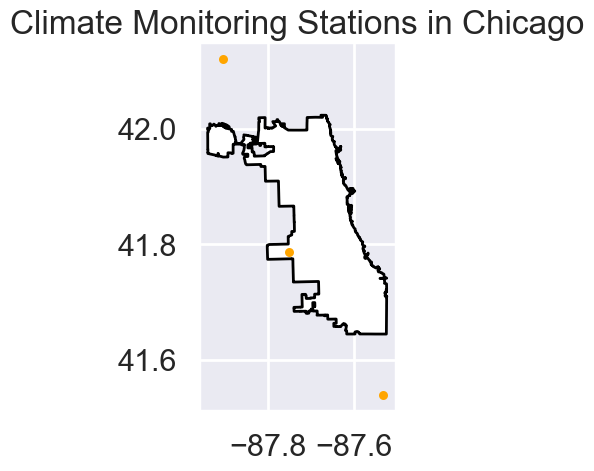

In [412]:
fig, ax = plt.subplots()

chicagoshape2.to_crs("EPSG:4326").plot(ax=ax, color='white', edgecolor='black')
climategdf.plot(ax=ax, color='orange', markersize=20)
plt.title('Climate Monitoring Stations in Chicago')

In [550]:
lansing = climatedf[climatedf['NAME'] == stationnames[2]]
lansingname = stationnames[2]
palname = stationnames[1]
hourly_mask = climatedf['NAME'] == lansingname
# 2. Separate the "Hourly" station from the "Daily" ones
# Let's assume Station 'C' is the hourly one
df_hourly = climatedf[hourly_mask].copy()
df_daily_others = climatedf[~hourly_mask].copy()
df_hourly['date'] = df_hourly['DATE'].dt.date
df_hourly['YEAR'] = df_hourly['DATE'].dt.year
# 3. Resample only the hourly station
# We group by station_id to preserve that column, then resample by Day ('D')
df_c_resampled = df_hourly.set_index('DATE').groupby('NAME')['HourlyDryBulbTemperature'].resample('D').mean().reset_index().rename(columns={'HourlyDryBulbTemperature': 'DailyAverageDryBulbTemperature'})

# 4. Standardize the date columns for a clean merge
# Ensuring both dataframes have a 'date' column without time attached
df_c_resampled['date'] = df_c_resampled['DATE'].dt.date
# df_c_resampled['YEAR'] = df_c_resampled['DATE'].dt.year
df_daily_others['date'] = df_daily_others['DATE'].dt.date


# 5. Combine them back into one master dataset
final_combined_df = pd.concat([df_daily_others, df_c_resampled], ignore_index=True)
final_combined_df = final_combined_df.drop(columns=['YEAR'])
final_combined_df['YEAR'] = final_combined_df['DATE'].dt.year


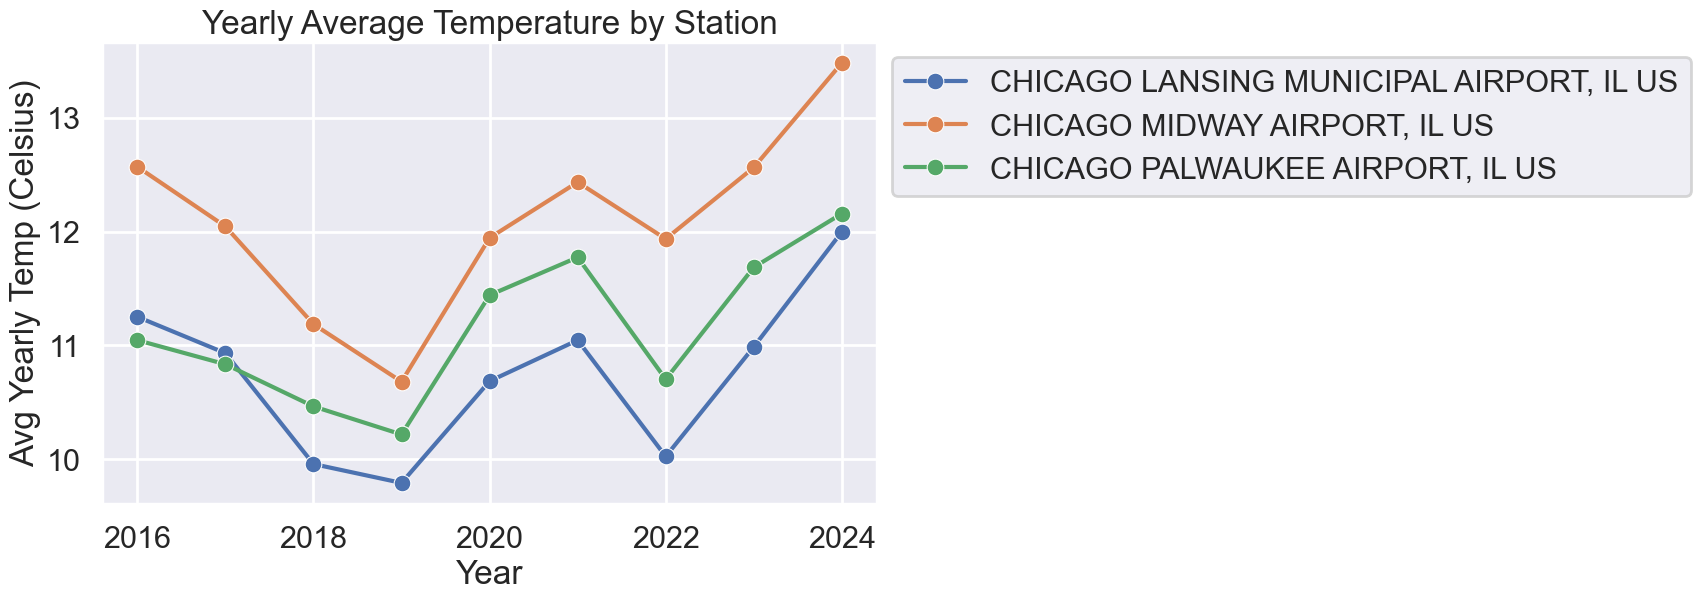

In [568]:
final_combined_df['DailyAverageDryBulbTemperature'] = final_combined_df['DailyAverageDryBulbTemperature'].replace('*', np.nan)
final_combined_df['DailyAverageDryBulbTemperature'] = pd.to_numeric(
    final_combined_df['DailyAverageDryBulbTemperature'], 
    errors='coerce'
)
yearlyavgtemps = final_combined_df.groupby(['NAME', 'YEAR'])['DailyAverageDryBulbTemperature'].mean().reset_index()
yearlyavgtemps['NAME'].unique()
yearlyavgtemps = yearlyavgtemps[yearlyavgtemps['YEAR'] < 2025]

fix, ax = plt.subplots(figsize=(10, 6))
sns.set_theme("poster")
sns.lineplot(x='YEAR', y='DailyAverageDryBulbTemperature', data=yearlyavgtemps, hue='NAME', marker='o')
plt.xlabel('Year')
plt.title('Yearly Average Temperature by Station')
plt.ylabel('Avg Yearly Temp (Celsius)')
ax.legend(fontsize='small')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


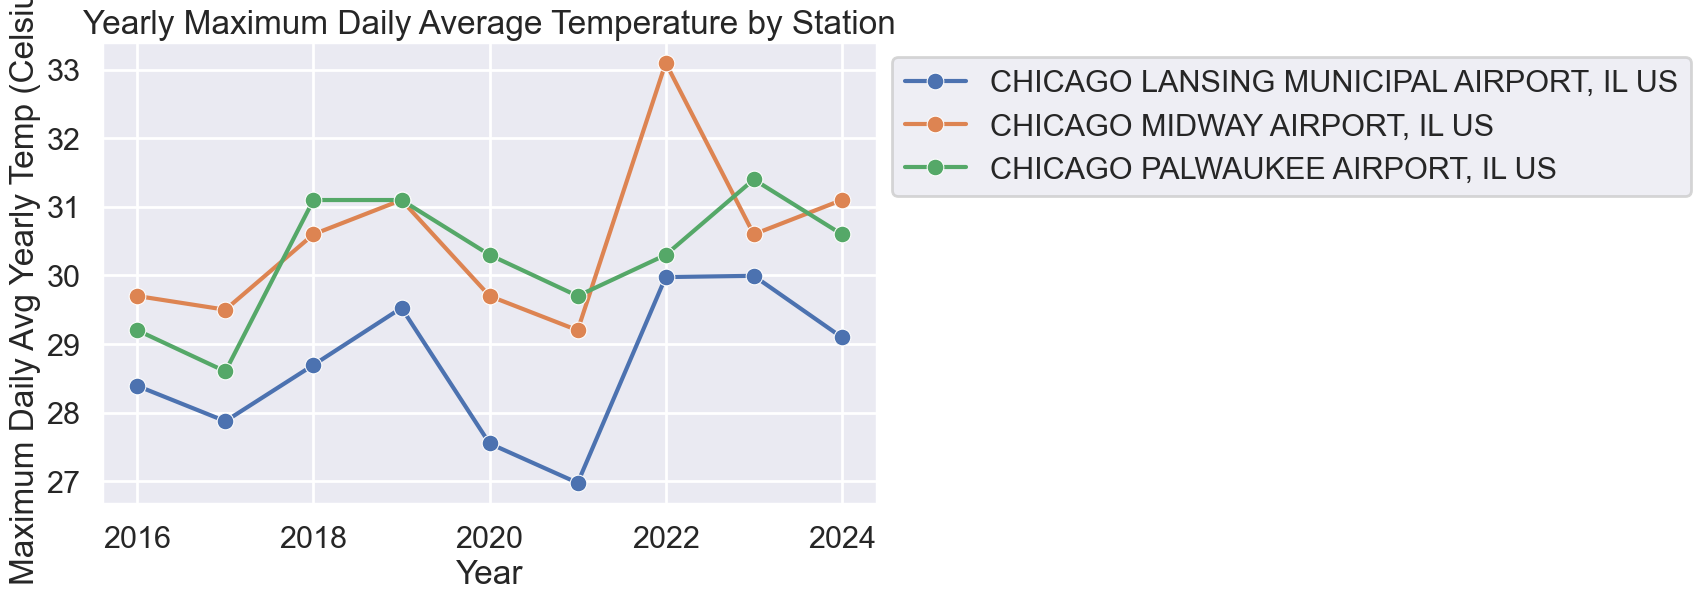

In [574]:
# Maximums in daily average temps: 
yearlymaximums = final_combined_df.groupby(['NAME', 'YEAR'])['DailyAverageDryBulbTemperature'].max().reset_index()
yearlymaximums = yearlymaximums[yearlymaximums['YEAR'] < 2025]

fix, ax = plt.subplots(figsize=(10, 6))
sns.set_theme("poster")
sns.lineplot(x='YEAR', y='DailyAverageDryBulbTemperature', data=yearlymaximums, hue='NAME', marker='o')
plt.xlabel('Year')
plt.title('Yearly Maximum Daily Average Temperature by Station')
plt.ylabel('Maximum Daily Avg Yearly Temp (Celsius)')
ax.legend(fontsize='small')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

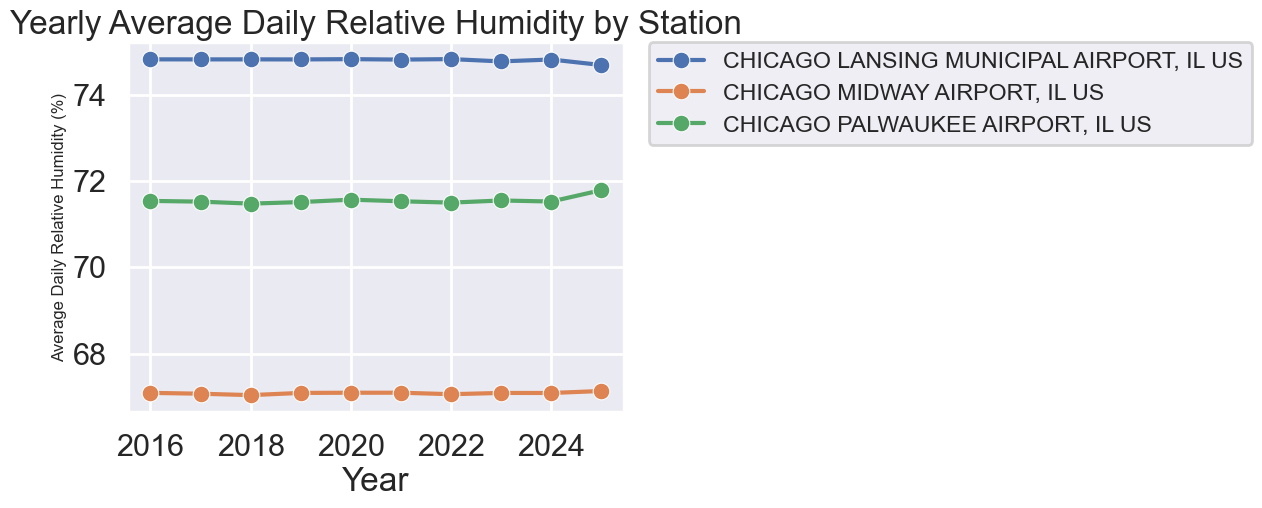

In [648]:
#Humidity: 
dailycols2 = [col for col in climatedf.columns if 'Daily' in col]
humiditycols = [col for col in climatedf.columns if 'Humidity' in col]
# humiditycols
humidity = climatedf.groupby(['NAME', 'YEAR'])['DailyAverageRelativeHumidity'].mean().reset_index()

sns.lineplot(x='YEAR', y='DailyAverageRelativeHumidity', data=humidity, hue='NAME', marker='o')
plt.xlabel('Year')
plt.title('Yearly Average Daily Relative Humidity by Station')
plt.ylabel('Average Daily Relative Humidity (%)',fontsize=12)
plt.legend(fontsize='x-small', bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0.)


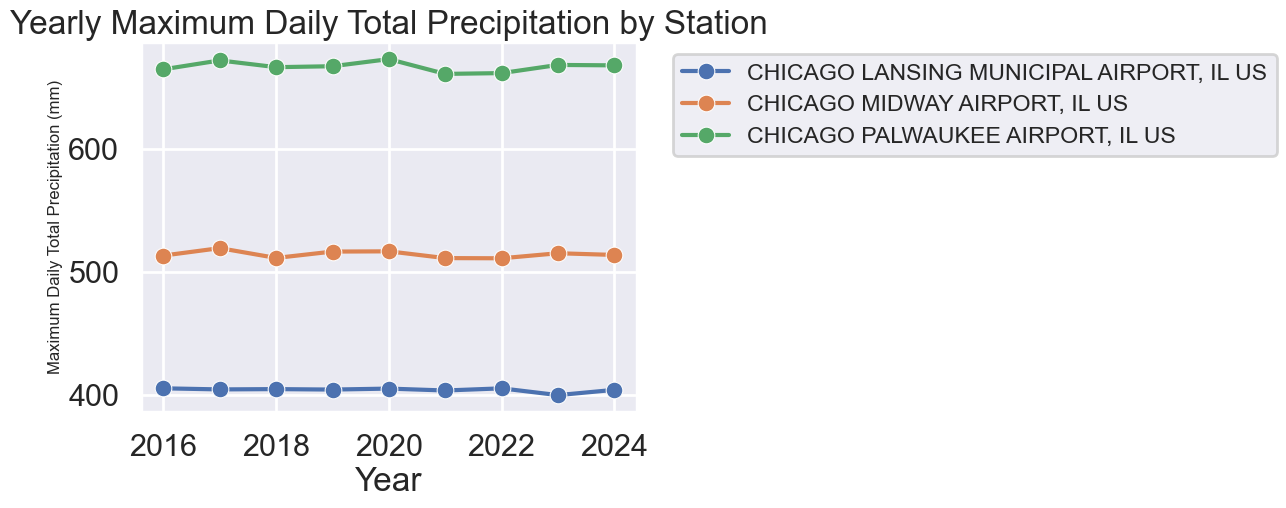

In [671]:

#daily maximum precipitation:
climatedf['DailyTotalPrecipitation'] = climatedf.groupby(['NAME', 'DAY'])['HourlyPrecipitation'].transform('sum')
dailymaxprecip = climatedf.groupby(['NAME', 'YEAR'])['DailyTotalPrecipitation'].mean().reset_index()
dailymaxprecip = dailymaxprecip[dailymaxprecip['YEAR'] < 2025]

sns.lineplot(x='YEAR', y='DailyTotalPrecipitation', data=dailymaxprecip, hue='NAME', marker='o')
plt.xlabel('Year')
plt.title('Yearly Maximum Daily Total Precipitation by Station')
plt.ylabel('Maximum Daily Total Precipitation (mm)',fontsize=12)
plt.legend(fontsize='x-small', bbox_to_anchor=(1.05, 1))


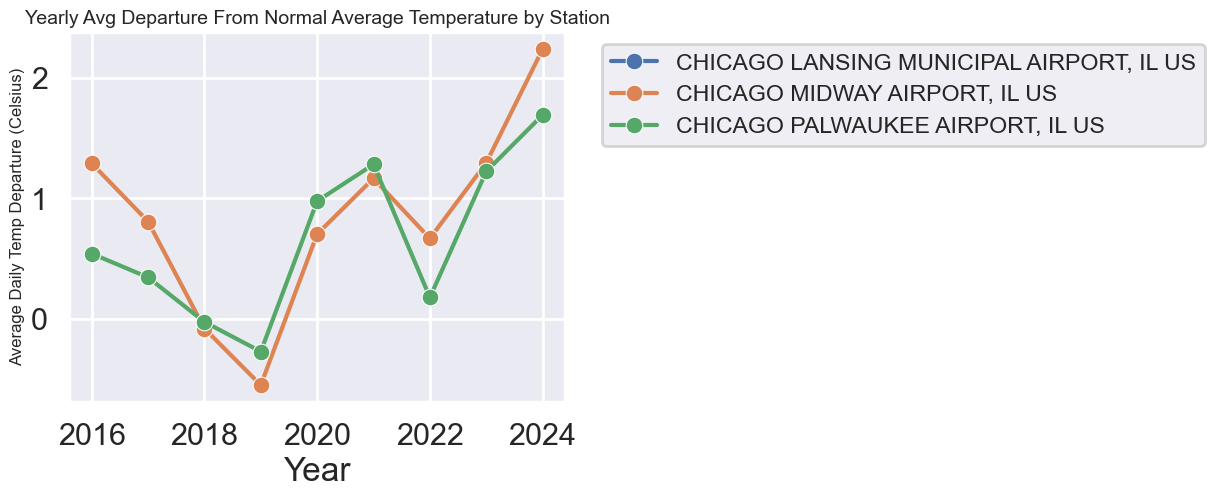

In [684]:
depcols = [col for col in climatedf.columns if 'Departure' in col]
depcols
climatedf['DailyDepartureFromNormalAverageTemperature'] = pd.to_numeric(climatedf['DailyDepartureFromNormalAverageTemperature'], errors='coerce')
tempdeparture = climatedf.groupby(['NAME', 'YEAR'])['DailyDepartureFromNormalAverageTemperature'].mean().reset_index()
tempdeparture = tempdeparture[tempdeparture['YEAR'] < 2025]
sns.lineplot(x='YEAR', y='DailyDepartureFromNormalAverageTemperature', data=tempdeparture, hue='NAME', marker='o')
plt.xlabel('Year')
plt.title('Yearly Avg Departure From Normal Average Temperature by Station', fontsize=14)
plt.ylabel('Average Daily Temp Departure (Celsius)',fontsize=12)
plt.legend(fontsize='x-small', bbox_to_anchor=(1.05, 1))

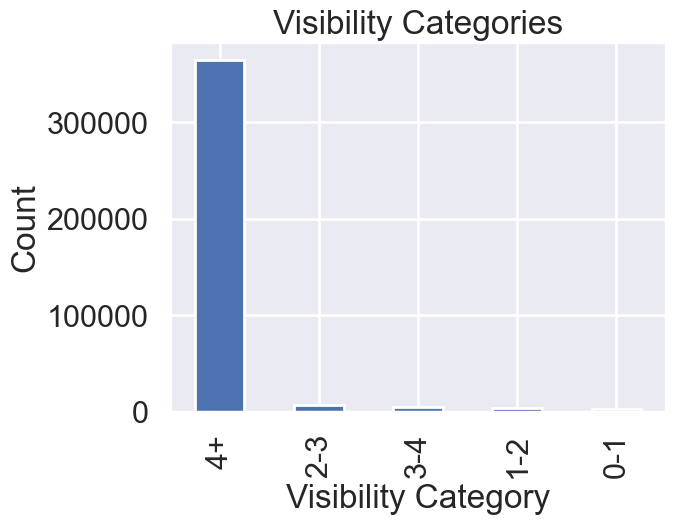

In [631]:
# Look at visibility distributions:
visibilitycols = [col for col in climatedf.columns if 'Visibility' in col]
climatedf['HourlyVisibility'].value_counts()
# can you segment these into five categories and make a barplot of them?

visibilitydf = climatedf[['HourlyVisibility']].dropna()
visibilitydf['HourlyVisibility'] = pd.to_numeric(visibilitydf['HourlyVisibility'], errors='coerce')
visibilitydf['visibility_category'] = pd.cut(visibilitydf['HourlyVisibility'], 
                                          bins=[0, 1, 2, 3, 4, float('inf')], 
                                          labels=['0-1', '1-2', '2-3', '3-4', '4+'])

visibility_category_counts = visibilitydf['visibility_category'].value_counts()
visibility_category_counts.plot(kind='bar')
plt.title('Visibility Categories')
plt.xlabel('Visibility Category')
plt.ylabel('Count')
plt.show()

In [765]:
# Include means, standard deviations, and medians for each of those above variables in a table

# Create a summary table for each station
lansingname = stationnames[2]
midwayname = stationnames[0]
palname = stationnames[1]

lansing = climatedf[climatedf['NAME'] == lansingname]
midway = climatedf[climatedf['NAME'] == midwayname]
pal = climatedf[climatedf['NAME'] == palname]

lansing_summary_table = lansing.agg({
    'DailyAverageRelativeHumidity': ['mean', 'std', 'median'],
    'DailyTotalPrecipitation': ['mean', 'std', 'median'],
    'DailyAverageDryBulbTemperature': ['mean', 'std', 'median']
}).round(2)

lansing_summary_table['Station'] = lansingname

# Flatten column names
lansing_summary_table.columns = [col for col in lansing_summary_table.columns.values]

midway_summary_table = midway.agg({
    'DailyDepartureFromNormalAverageTemperature': ['mean', 'std', 'median'],
    'DailyAverageRelativeHumidity': ['mean', 'std', 'median'],
    'DailyTotalPrecipitation': ['mean', 'std', 'median'],
    'DailyAverageDryBulbTemperature': ['mean', 'std', 'median']
}).round(2)

midway_summary_table['Station'] = midwayname

pal_summary_table = pal.agg({
    'DailyDepartureFromNormalAverageTemperature': ['mean', 'std', 'median'],
    'DailyAverageRelativeHumidity': ['mean', 'std', 'median'],
    'DailyTotalPrecipitation': ['mean', 'std', 'median'],
    'DailyAverageDryBulbTemperature': ['mean', 'std', 'median'],
}).round(2)

pal_summary_table['Station'] = palname

pal_summary_table
# midway_summary_table
# lansing_summary_table

,DailyDepartureFromNormalAverageTemperature,DailyAverageRelativeHumidity,DailyTotalPrecipitation,DailyAverageDryBulbTemperature,Station
mean,0.66,71.52,667.04,10.72,"CHICAGO PALWAUKEE AIRPORT, IL US"
std,4.71,1.38,238.89,0.54,"CHICAGO PALWAUKEE AIRPORT, IL US"
median,0.70,71.69,607.40,10.76,"CHICAGO PALWAUKEE AIRPORT, IL US"


# Air Quality Data 

In [716]:
airqualitypath = '/Users/griffinberonio/Documents/AAE 724/Datasets/master_aqs_df_17_031.csv'
airqualitydf = pd.read_csv(airqualitypath)
airqualitydf['date_local'] = pd.to_datetime(airqualitydf['date_local'])
airqualitydf['date_local'].max()
airqualitydf['YEAR'] = airqualitydf['date_local'].dt.year
airqualitydf['MONTH'] = airqualitydf['date_local'].dt.month
airqualitydf['DAY'] = airqualitydf['date_local'].dt.day
airqualitydf = airqualitydf.rename(columns={'local_site_name': 'NAME'})


# airqualitydf.head()
colstodrop = ['state_code','county_code','site_number','parameter_code','method_code','cbsa_code','cbsa','date_of_last_change','method_code']
airqualitydf = airqualitydf.drop(columns=colstodrop)

/var/folders/d1/xmw0d36x7fn39t0jfvtsbzk80000gn/T/ipykernel_33395/3055550355.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  airqualitydf = pd.read_csv(airqualitypath)


In [701]:
siteaddresses = airqualitydf[['site_address', 'city', 'state', 'local_site_name']].drop_duplicates()
siteaddresses['full_address'] = siteaddresses['site_address'] + ', ' + siteaddresses['city'] + ', ' + siteaddresses['state']
fulladdresses = siteaddresses[['local_site_name', 'full_address']]
fulladdresses

addressgdf = gpd.tools.geocode(fulladdresses['full_address'])


In [717]:
for col in airqualitydf.columns:
    print(col)

poc
latitude
longitude
datum
parameter
sample_duration_code
sample_duration
pollutant_standard
date_local
units_of_measure
event_type
observation_count
observation_percent
validity_indicator
arithmetic_mean
first_max_value
first_max_hour
aqi
method
NAME
site_address
state
county
city
YEAR
MONTH
DAY


We are interested in AQI (aqi), Arithmetic mean (arithmetic_mean), First Max Value (first_max_value), first max hour (first_max_hour) and the locations and dates.

In [712]:
airqualitydf['first_max_hour'].unique()

array([ 0,  8,  9,  3, 17, 10, 18,  1,  6, 11, 22, 21, 20, 15,  2, 19, 13,
       23,  4, 14, 12, 16,  5,  7])

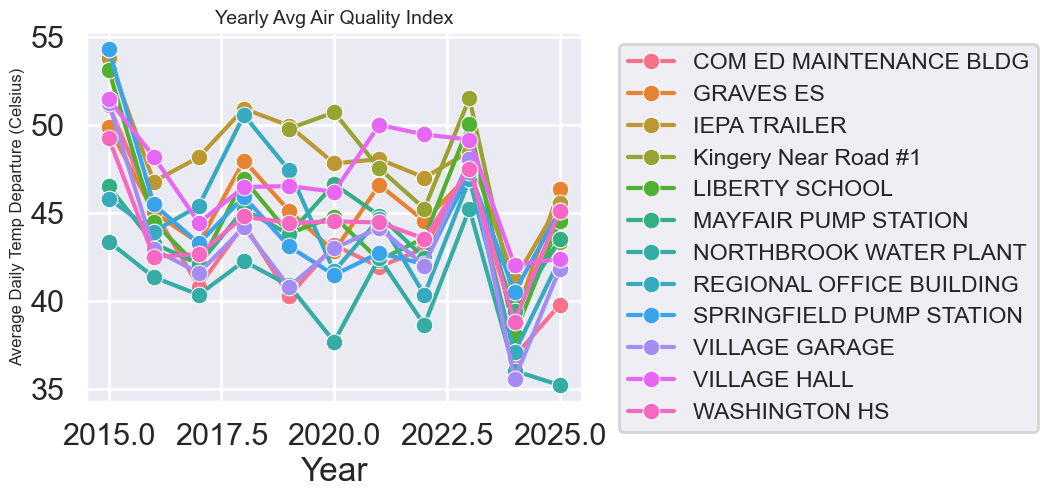

In [ ]:
# Air quality index:

yearlyaqiavgs = airqualitydf.groupby(['NAME','YEAR'])['aqi'].mean().reset_index()

sns.lineplot(x='YEAR', y='aqi', data=yearlyaqiavgs, hue='NAME', marker='o')
plt.xlabel('Year')
plt.title('Yearly Avg Air Quality Index', fontsize=14)
plt.ylabel('Air Quality Index (AQI)',fontsize=12)
plt.legend(fontsize='x-small', bbox_to_anchor=(1.05, 1))


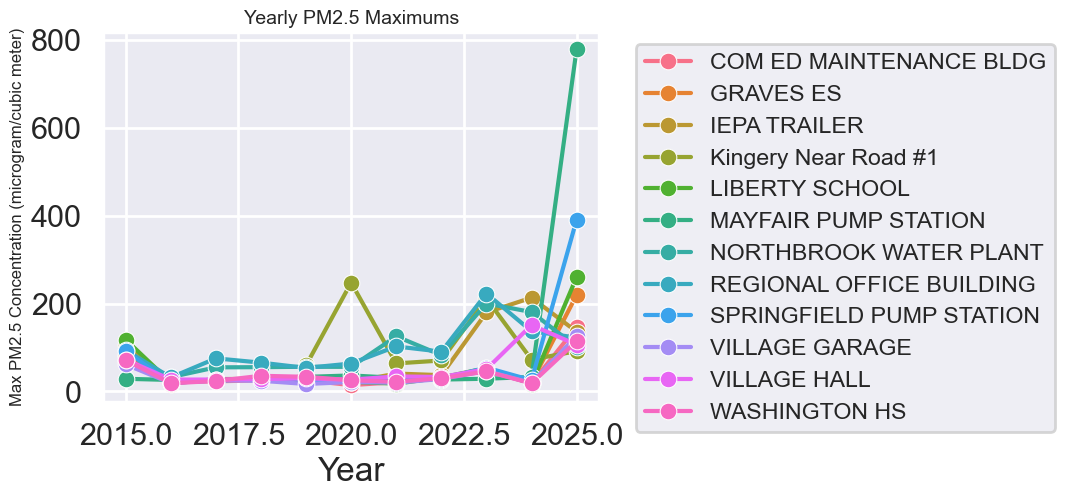

In [726]:
#Look at overall trend in PM2.5 concentrations, check differences in methods over time, Segment by site. 
yearlyconcentrationmax = airqualitydf.groupby(['NAME','YEAR'])['first_max_value'].max().reset_index()

sns.lineplot(x='YEAR', y='first_max_value', data=yearlyconcentrationmax, hue='NAME', marker='o')
plt.xlabel('Year')
plt.title('Yearly PM2.5 Maximums', fontsize=14)
plt.ylabel('Max PM2.5 Concentration (microgram/cubic meter)',fontsize=12)
plt.legend(fontsize='x-small', bbox_to_anchor=(1.05, 1))

,NAME,YEAR,first_max_value
0,COM ED MAINTENANCE BLDG,2015,81.8
1,COM ED MAINTENANCE BLDG,2016,21.5
2,COM ED MAINTENANCE BLDG,2017,23.2
3,COM ED MAINTENANCE BLDG,2018,25.3
4,COM ED MAINTENANCE BLDG,2019,25.4
...,...,...,...
123,WASHINGTON HS,2021,22.2
124,WASHINGTON HS,2022,30.1
125,WASHINGTON HS,2023,45.7
126,WASHINGTON HS,2024,18.6


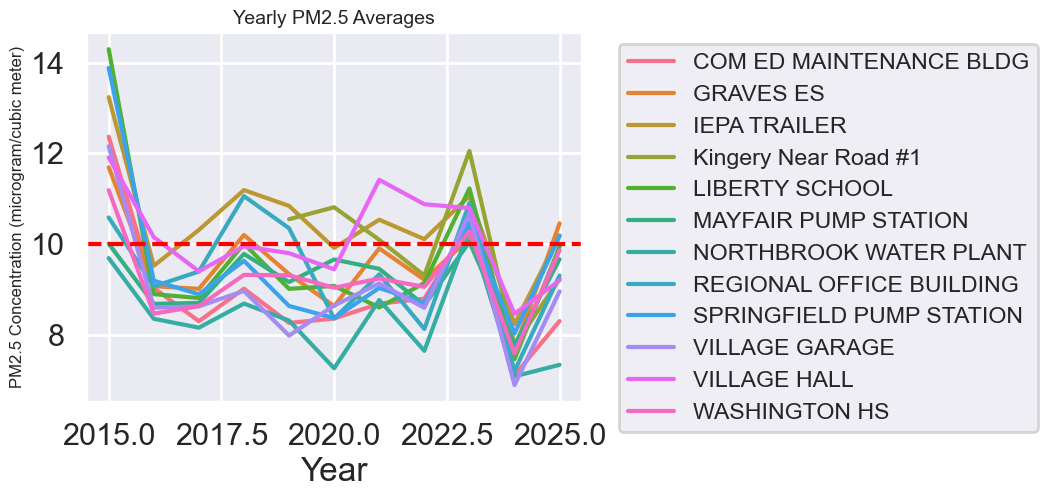

In [733]:
# Daily Averages over time
avgdailyaverage = airqualitydf.groupby(['NAME','YEAR'])['arithmetic_mean'].mean().reset_index()

sns.lineplot(x='YEAR',y='arithmetic_mean',data=avgdailyaverage,hue='NAME')
plt.xlabel('Year')
plt.title('Yearly PM2.5 Averages', fontsize=14)
plt.ylabel('PM2.5 Concentration (microgram/cubic meter)',fontsize=12)
plt.axhline(y=10, color='red',linestyle = '--')
plt.legend(fontsize='x-small', bbox_to_anchor=(1.05, 1))

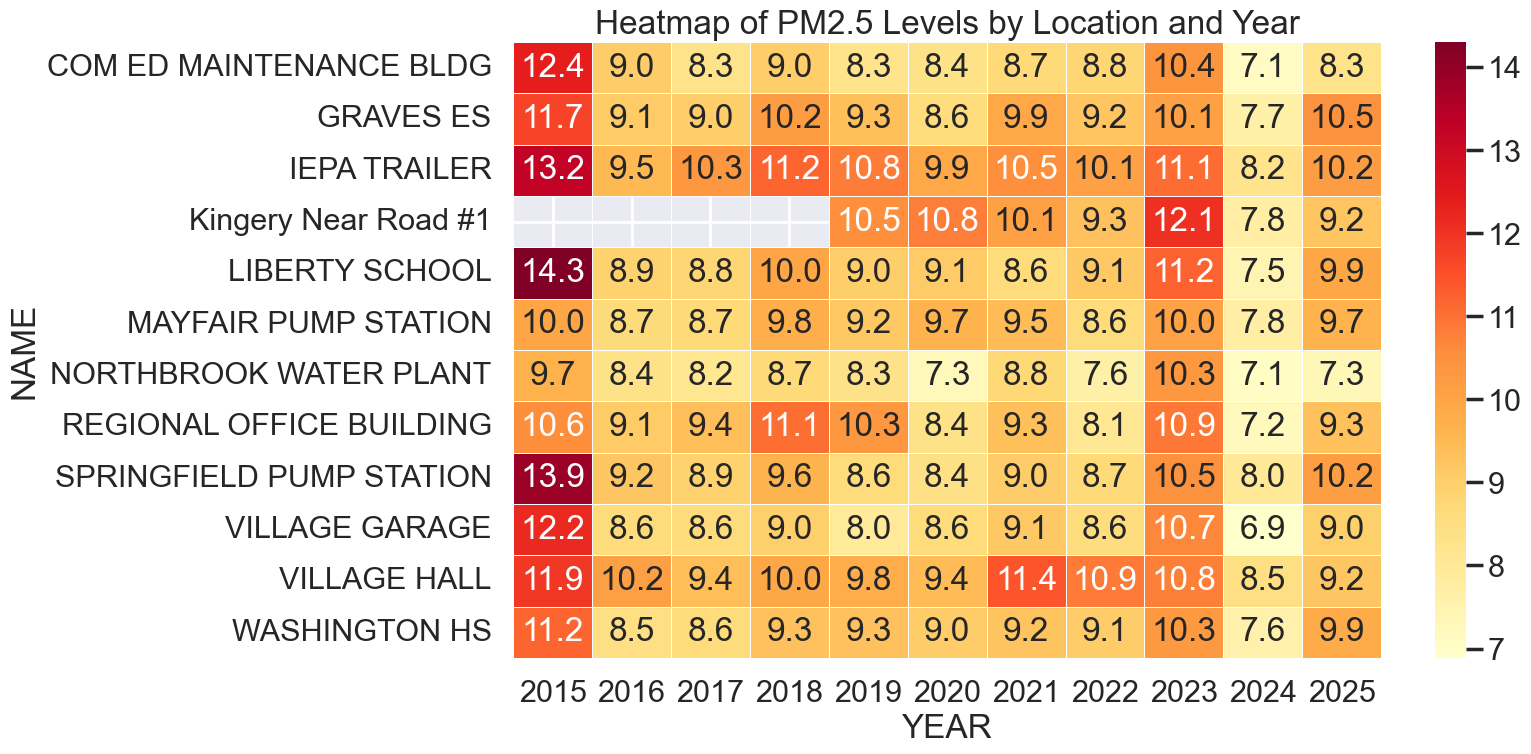

In [ ]:
#Averages heatmap:
airqualitymeans = airqualitydf.groupby(['NAME','YEAR'])['arithmetic_mean'].mean().reset_index()
pivot_df = airqualitymeans.pivot(index="NAME", columns="YEAR", values="arithmetic_mean")

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_df, annot=True, cmap="YlOrRd", fmt=".1f", linewidths=.5)
 
plt.title('Heatmap of PM2.5 Levels by Location and Year')
plt.show()

/var/folders/d1/xmw0d36x7fn39t0jfvtsbzk80000gn/T/ipykernel_33395/2900172966.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


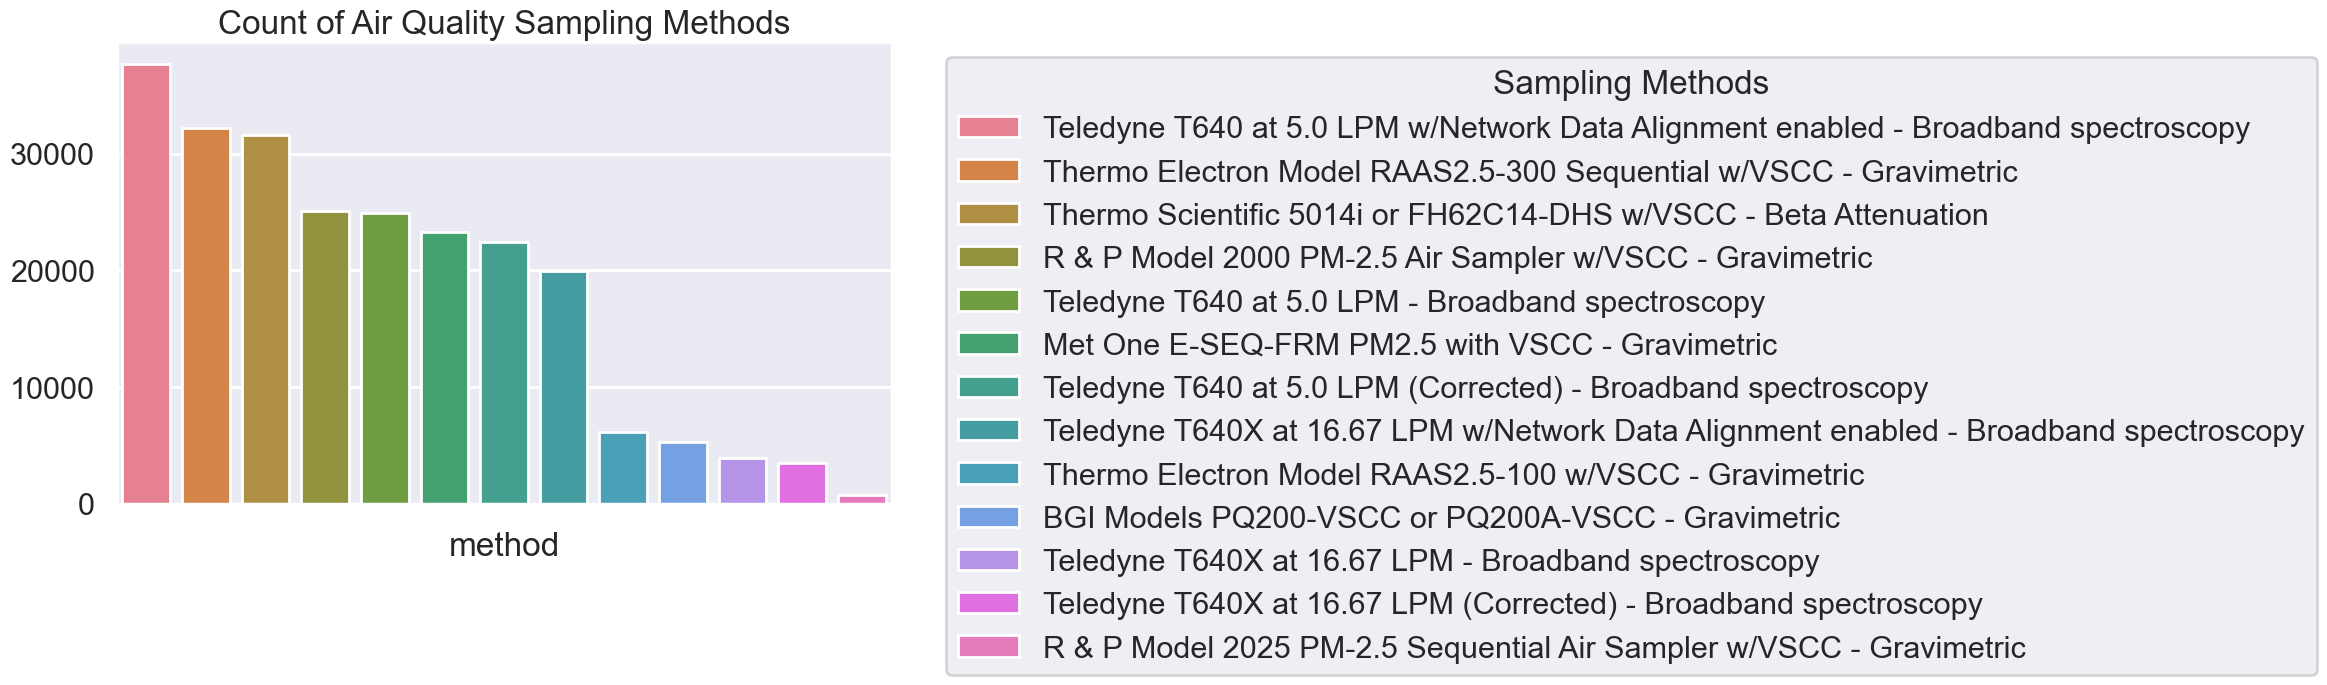

In [757]:
#Distributions of sampling methods overall: 
methods = airqualitydf['method'].value_counts().reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='method', y='count', data=methods, hue='method', legend=True)

# 3. Customizing the Legend
# This moves the legend outside so it doesn't overlap the bars
plt.legend(title='Sampling Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels([])
plt.ylabel('') # Hiding y-label since the names are in the legend
plt.title('Count of Air Quality Sampling Methods')
plt.tight_layout()

plt.show()

In [759]:
# provide summary statistics for PM2.5 concentrations, including means, standard deviations, and medians, and compare these statistics across different monitoring sites and time periods.

airqualitysummary = airqualitydf.agg({
    'first_max_value': ['mean', 'std', 'median'],
    'arithmetic_mean': ['mean', 'std', 'median'],
    'aqi': ['mean', 'std', 'median']
}).round(2)

airqualitysummary


,first_max_value,arithmetic_mean,aqi
mean,10.02,9.42,44.32
std,8.00,6.80,18.18
median,8.50,8.20,46.00


In [762]:
airqualitystations = airqualitydf['NAME'].unique()
len(airqualitystations)

12

Text(0.5, 1.0, 'Monitoring Sites in Chicago')

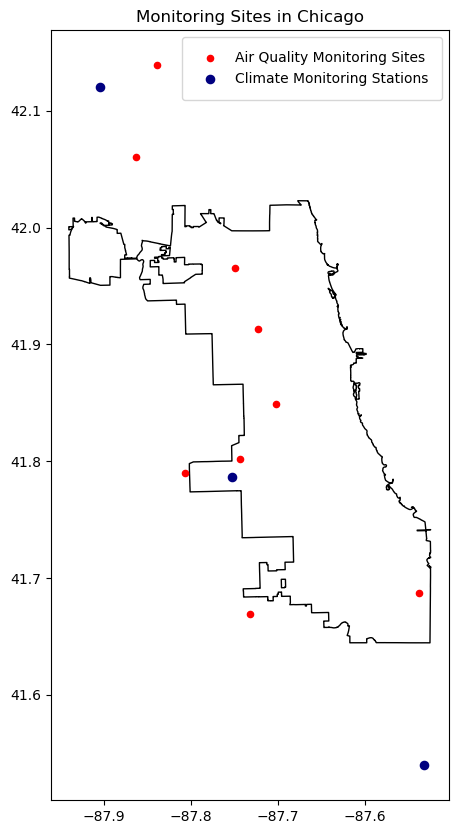

In [138]:

fig, ax = plt.subplots(figsize=(12,10))

chicagoshape2.to_crs("EPSG:4326").plot(ax=ax, color='white', edgecolor='black')
addys = gpd.GeoDataFrame(addressgdf, geometry='geometry', crs="EPSG:4326")
addys.plot(ax=ax, color='red', markersize=20)
climategdf.plot(ax=ax, color='navy', markersize=35)
# plt.legend(['Air Quality Monitoring Sites', 'Climate Monitoring Stations'])
ax.legend(['Air Quality Monitoring Sites', 'Climate Monitoring Stations'], loc='upper right', borderpad=1)
# ax.legend(loc='upper right', borderpad=1)
plt.title('Monitoring Sites in Chicago')



# Merging Datasets

In [146]:
# renewablesdf.head()
climateandrenewables = pd.merge(cookrenewables, climatedf, left_on='Date Online', right_on='DATE', how = 'inner') 

In [147]:
# Individual data so far: cookrenewables, climatedf, airqualitydf
#Years:
rmin = cookrenewables['Date Online'].min()
rmax = cookrenewables['Date Online'].max()
cmin = climatedf['DATE'].min()
cmax = climatedf['DATE'].max()
amin = airqualitydf['date_local'].min()
amax = airqualitydf['date_local'].max()

print(f"Renewables data range: {rmin} to {rmax}, Climate data range: {cmin} to {cmax}, Air Quality data range: {amin} to {amax}")

# Overlapping year range: 2016-2025 


Renewables data range: 1989-03-01 00:00:00 to 2026-01-01 00:00:00, Climate data range: 2016-01-02 00:00:00 to 2025-01-02 23:55:00, Air Quality data range: 2015-01-03 00:00:00 to 2025-11-30 00:00:00
